In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import scipy.signal
import numpy.matlib
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
from matplotlib import colors as mcolors

In [3]:
import re
import os
import sys

In [4]:
sys.path.append('../')

##  Loading up change detection modules

In [5]:
from src.models import train_model
from src.features import build_features
from src.visualization import visualize

## Setting method params, stimulus encodings

In [7]:
# retinal data properties
stim_categories={'white': 3, 'fullfield' :0, 'multiscale':1, 'spatexp':2, 'spattempexp':2,'tempexp':4, 'natmov':1, 'scramnat':3, 'lowcont_white':3, 'lowcont_multiscale':1 }
firebrick=mcolors.CSS4_COLORS['firebrick']
red=mcolors.CSS4_COLORS['red']
coral=mcolors.CSS4_COLORS['coral']
seagreen=mcolors.CSS4_COLORS['seagreen']
grey=mcolors.CSS4_COLORS['grey']
royalblue=mcolors.CSS4_COLORS['royalblue']
color_ctgry=(grey, royalblue, red, coral, seagreen)
spat_corr={'grey': 'None', 'royalblue': 'Delta---', 'red':'Delta--', 'coral':'Delta-', 'seagreen':'None+' }

## Loading retinal data

In [8]:
dir=r'../Data/external/'
data_files=os.listdir(path=dir)

In [9]:
data_files

['.gitkeep',
 'data_02_16_12_t2.mat',
 'data_02_16_12_t9.mat',
 'data_02_18_10_t1.mat',
 'data_02_26_12_t2.mat',
 'data_02_26_12_t8.mat',
 'data_03_04_12_t12.mat',
 'data_03_04_12_t2.mat',
 'data_03_04_12_t7.mat',
 'data_03_13_12_t10.mat',
 'data_03_13_12_t2.mat',
 'data_03_13_12_t6.mat',
 'data_03_17_13_t11.mat',
 'data_03_17_13_t2.mat',
 'data_03_25_12_t11.mat',
 'data_03_25_12_t2.mat',
 'data_04_18_13_t2.mat',
 'data_05_08_13_t12.mat',
 'data_05_08_13_t15.mat',
 'data_05_08_13_t5.mat',
 'data_05_09_13_t12.mat',
 'data_05_09_13_t9.mat',
 'data_06_11_13_t2.mat',
 'data_06_11_13_t5.mat',
 'data_06_11_13_t8.mat',
 'data_06_27_12_t14.mat',
 'data_06_27_12_t8.mat',
 'data_06_28_13_t2.mat',
 'data_06_28_13_t6.mat',
 'data_06_28_13_t9.mat',
 'data_07_06_12_t12.mat',
 'data_07_06_12_t3.mat',
 'data_07_10_13_t8.mat',
 'data_08_09_12_t2.mat',
 'data_09_05_12_t5.mat',
 'data_09_27_12_t11.mat',
 'data_09_27_12_t2.mat',
 'data_10_21_10_t2.mat',
 'data_11_15_12_t2.mat',
 'data_12_06_12_t6.mat',
 '

../src/features/build_features.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  discrete_spikes=np.zeros(n_bins)
../src/features/build_features.py:26: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  discrete_spikes[spike_times]=1


(33, 1235092)
(123511, 33, 33)


/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(41170, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(20585, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(13723, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(123513, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(41171, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(20585, 33, 33)


/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(13723, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(123517, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(41172, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(20586, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
(33, 1235092)
(13724, 33, 33)
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


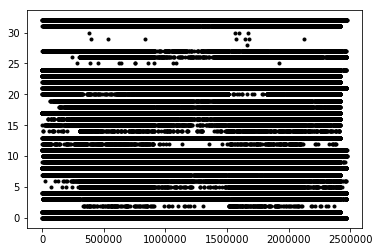

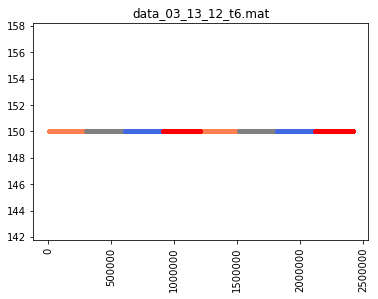

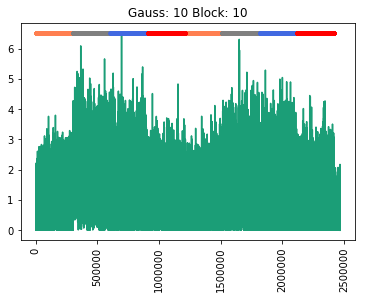

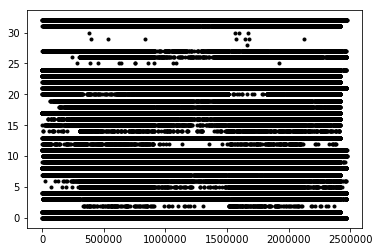

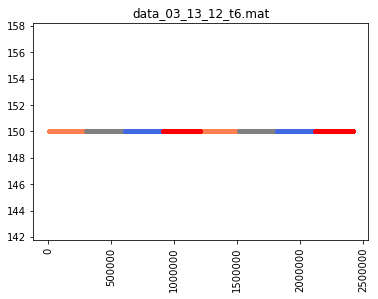

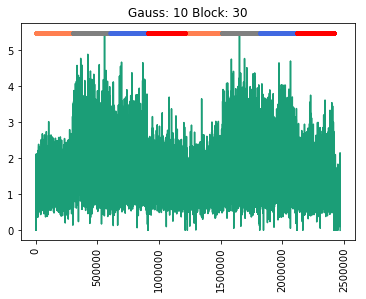

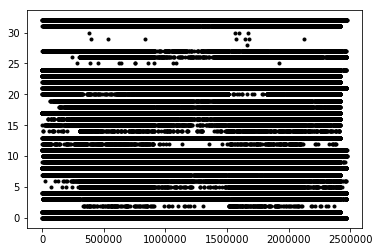

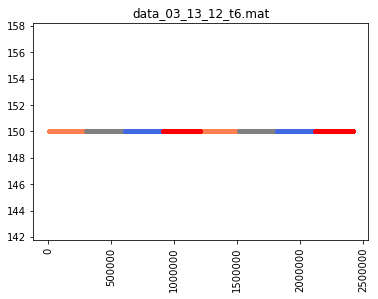

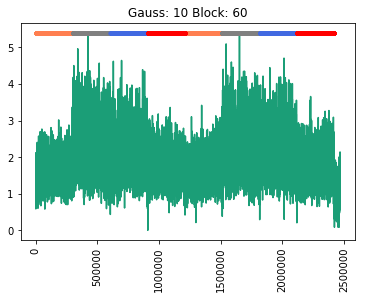

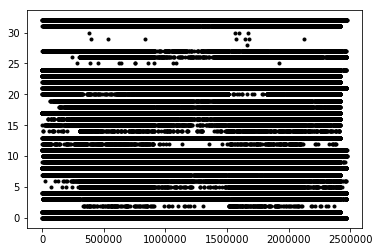

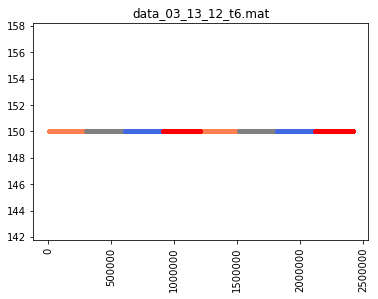

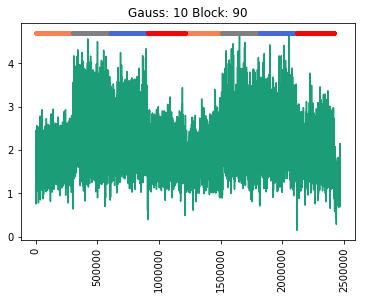

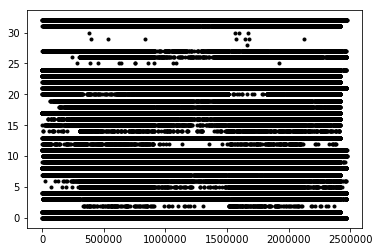

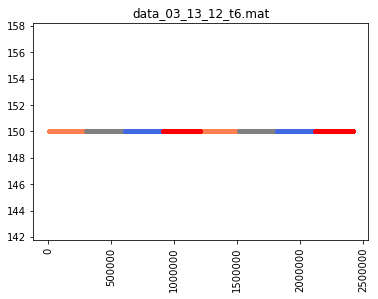

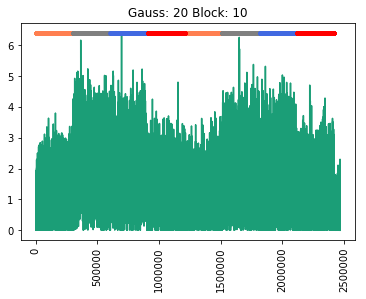

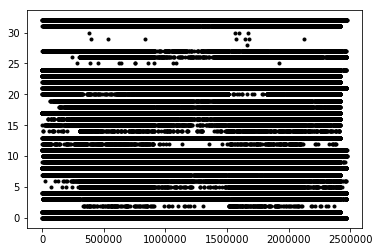

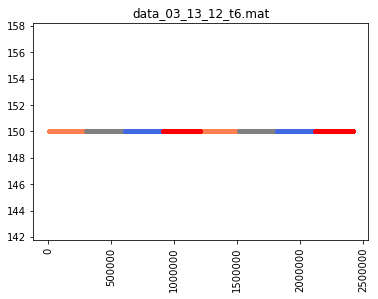

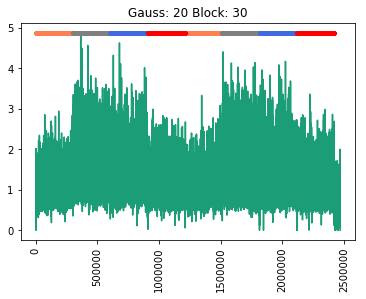

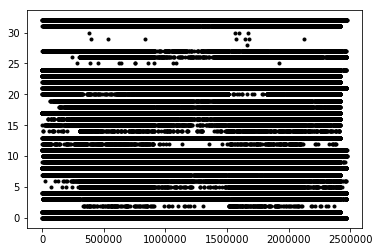

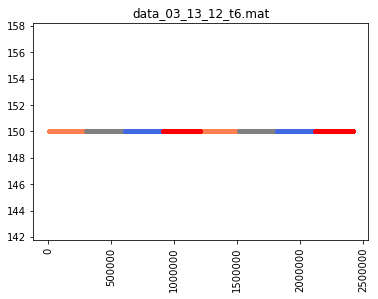

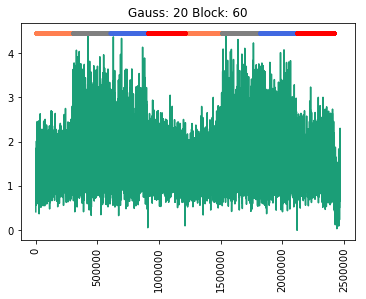

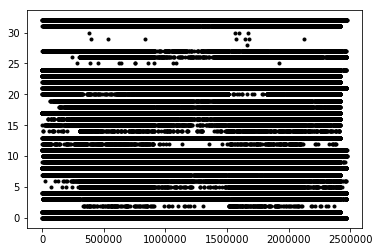

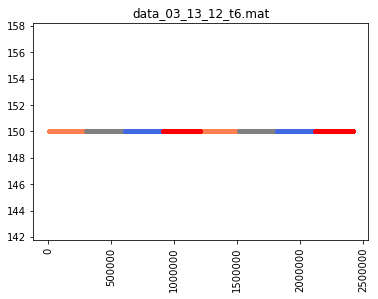

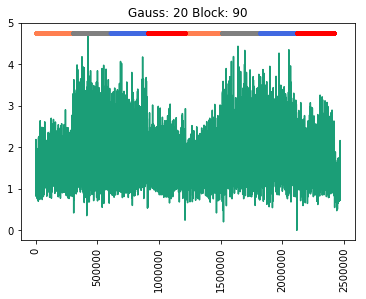

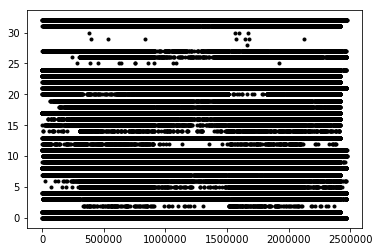

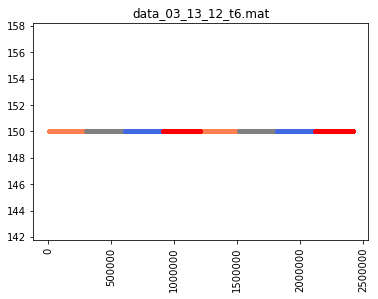

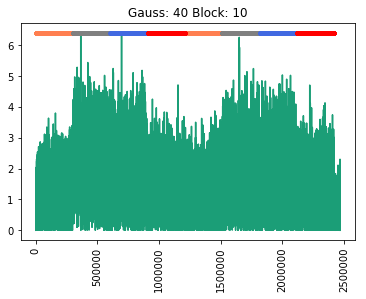

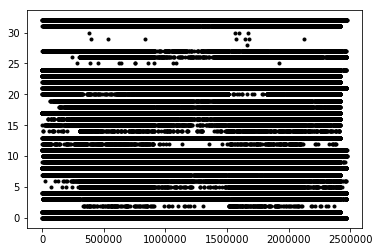

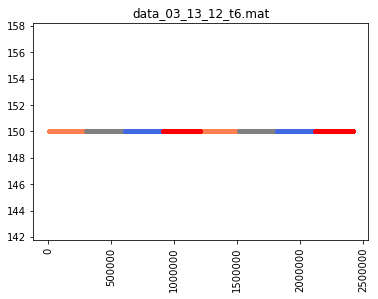

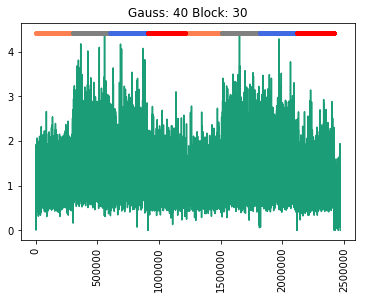

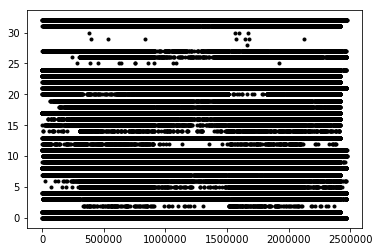

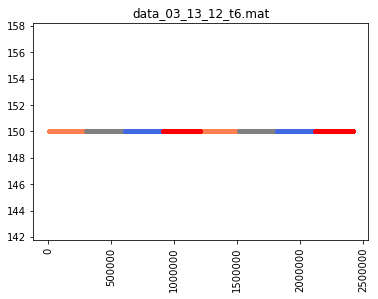

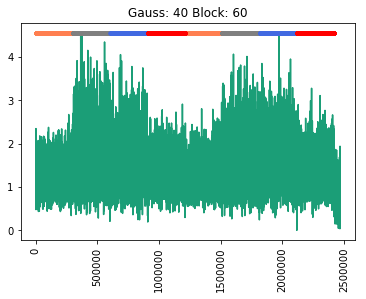

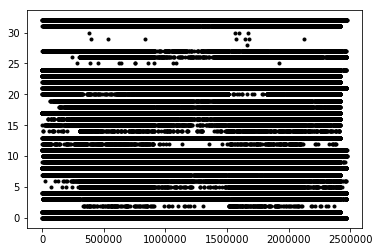

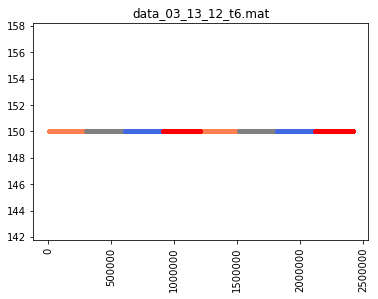

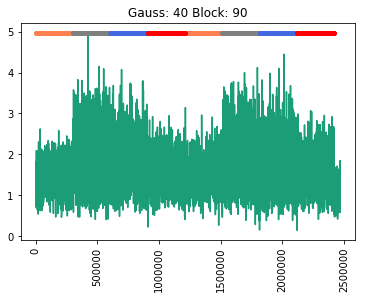

In [55]:
# setting up parameters
gauss_options=[5, 10, 20]
block_options=[10, 30, 60, 90]

for gauss in gauss_options:
    for block in block_options:
        params={'res':2, 'block_width': block }
        params['gauss_width']=gauss * params['res']
        params['methods']=[ 'diff_frobenius']#'pop_sum', 'mean', 'diff_base', 'variation','frobenius', 
        res=params['res']
        block_width=params['block_width']
        gauss_width=params['gauss_width']

        file='data_03_13_12_t6.mat'
        #file='data_03_13_12_t2'
        data_retina=scipy.io.loadmat(dir+file)
        data_retina['file']=file
        sum_diff_corr, stim=train_model.detect_changes(data_retina, params)
        visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
        plt.title('Gauss: ' + str(gauss_width) + ' Block: ' + str(block_width))

/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


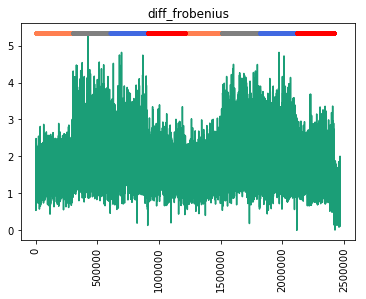

In [12]:
from changepy import pelt
from changepy.costs import normal_mean, poisson, exponential

In [47]:
sum_diff_corr

{'diff_frobenius': array([ 0.98305242,  0.97628269,  1.30227766, ...,  1.60960938,
         1.83114332,  1.42218314])}

In [48]:
summary_stat=sum_diff_corr['diff_frobenius']

In [49]:
cp_exponential=pelt(exponential(summary_stat), len(summary_stat))

In [50]:
time_pt=np.zeros(summary_stat.size * res * block_width)

In [40]:
summary_stat.size

22871

In [51]:
change_points=np.array(cp_exponential) * res * block_width

In [52]:
time_pt[change_points]=1

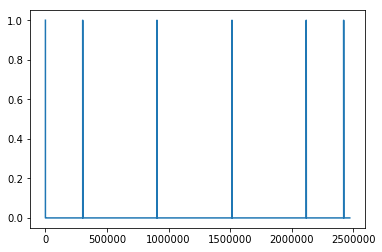

In [53]:
plt.plot(time_pt)

white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


/Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


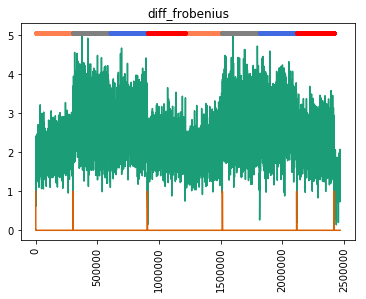

In [54]:
visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)
plt.plot(time_pt)